In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

poda = pd.read_csv('Pokemon.csv')
poda

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True
796,719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True
797,720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True
798,720,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True


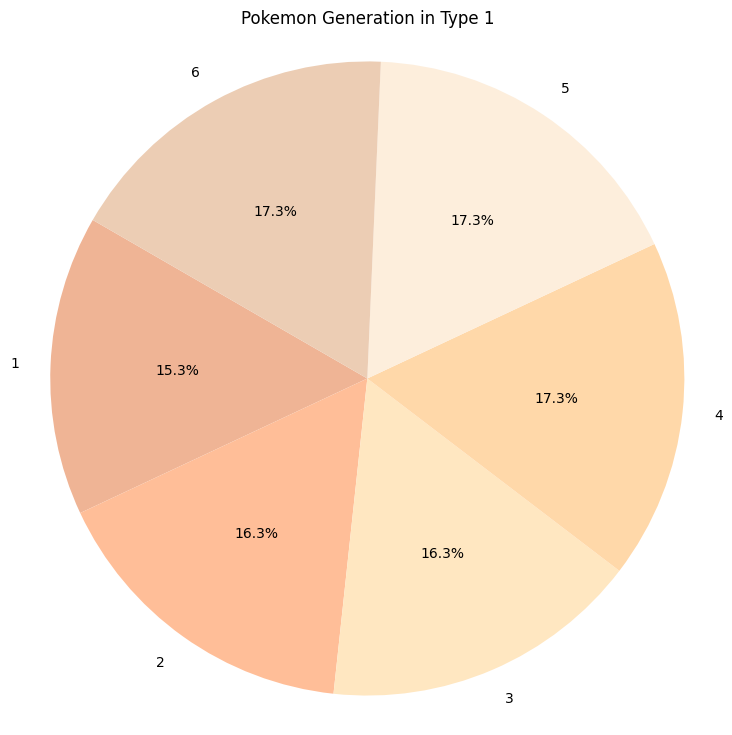

In [28]:
#filter data only for type 1 & defining colors
total_per_generation = poda.groupby(['Generation','Type 1'])['#'].count()
generation_counts = total_per_generation.groupby('Generation').count()

pastel = ['#EFB495', '#FFBE98', '#FFE7C1', '#FFD8A9', '#FDEEDC', '#ECCDB4']

#Making Pie Chart
plt.figure(figsize=(9,9))
plt.pie(generation_counts,labels = generation_counts.index, autopct='%1.1f%%', startangle=150, colors=pastel)

#add title
plt.title('Pokemon Generation in Type 1')
plt.axis('equal')

plt.show()

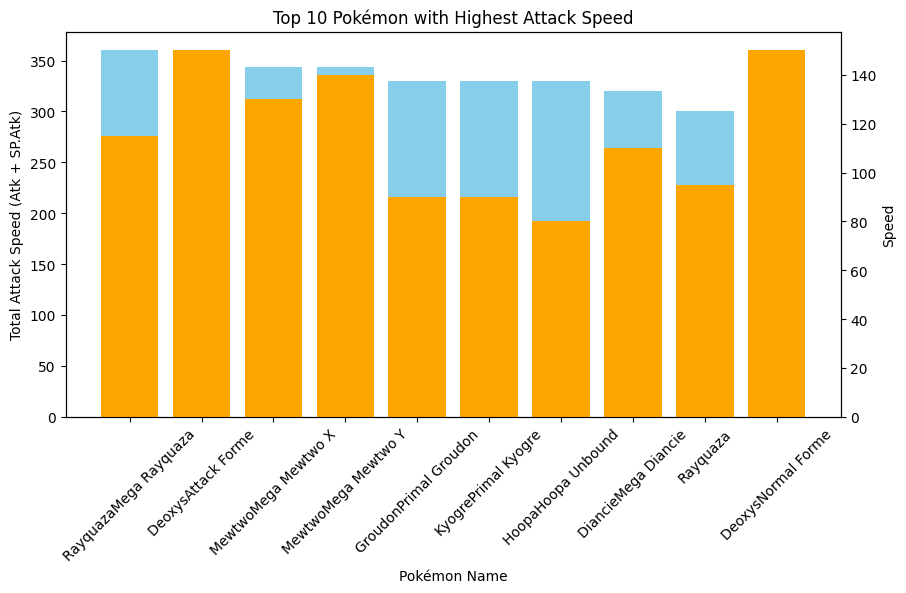

In [44]:
# Calculate the total attack speed by adding ATK and SP.ATK
poda['Total Attack Speed'] = poda['Attack'] + poda['Sp. Atk']

# Sort the data by Total Attack Speed in descending order
poda_sorted = poda.sort_values(by='Total Attack Speed', ascending=False)

# Select the top 10 Pokémon with the highest attack speed
top_10_pokemon = poda_sorted.head(10)

# Create a bar chart to visualize the results
plt.figure(figsize=(10, 5))
plt.bar(top_10_pokemon['Name'], top_10_pokemon['Total Attack Speed'], color='skyblue')
plt.xlabel('Pokémon Name')
plt.ylabel('Total Attack Speed (Atk + SP.Atk)')
plt.title('Top 10 Pokémon with Highest Attack Speed')
plt.xticks(rotation=45)

# Add a secondary axis for Speed
plt.twinx()
plt.bar(top_10_pokemon['Name'], top_10_pokemon['Speed'], color='orange')
plt.ylabel('Speed')

plt.show()

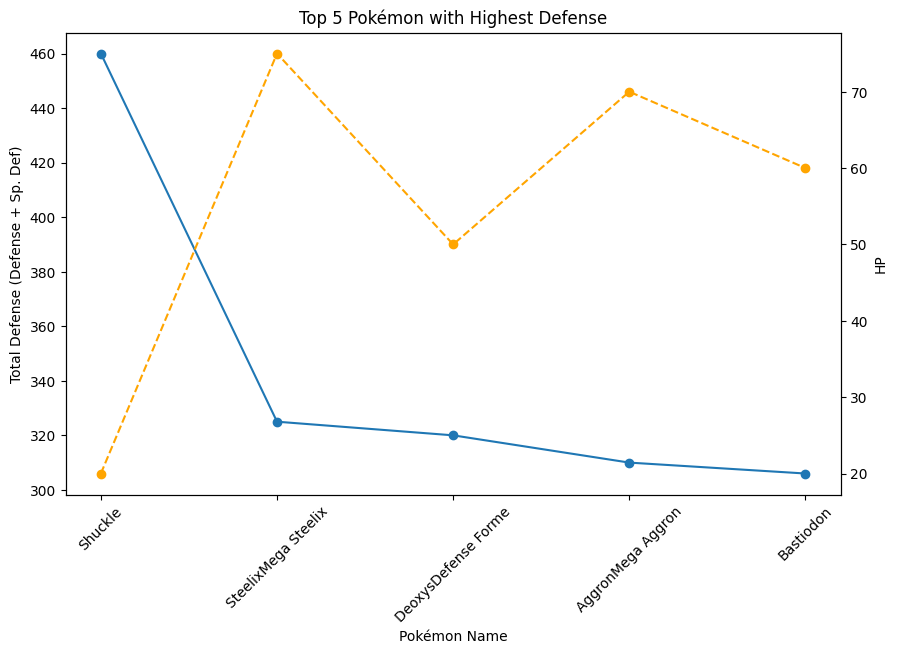

In [56]:
# Calculate the total defense by adding Defense and Special Defense
poda['Total Defense'] = poda['Defense'] + poda['Sp. Def']

# Sort the data by Total Defense in descending order
poda_sorted = poda.sort_values(by='Total Defense', ascending=False)

# Select the top 5 Pokémon with the highest defense
top_5_pokemon = poda_sorted.head(5)

# Create a plot to visualize the results
plt.figure(figsize=(10, 6))
plt.plot(top_5_pokemon['Name'], top_5_pokemon['Total Defense'], marker='o', linestyle='-')
plt.xlabel('Pokémon Name')
plt.ylabel('Total Defense (Defense + Sp. Def)')
plt.title('Top 5 Pokémon with Highest Defense')
plt.xticks(rotation=45)

# Add a secondary axis for HP
plt.twinx()
plt.plot(top_5_pokemon['Name'], top_5_pokemon['HP'], marker='o', linestyle='--', color='orange')
plt.ylabel('HP')

plt.show()

IndexError: index 2 is out of bounds for axis 0 with size 2

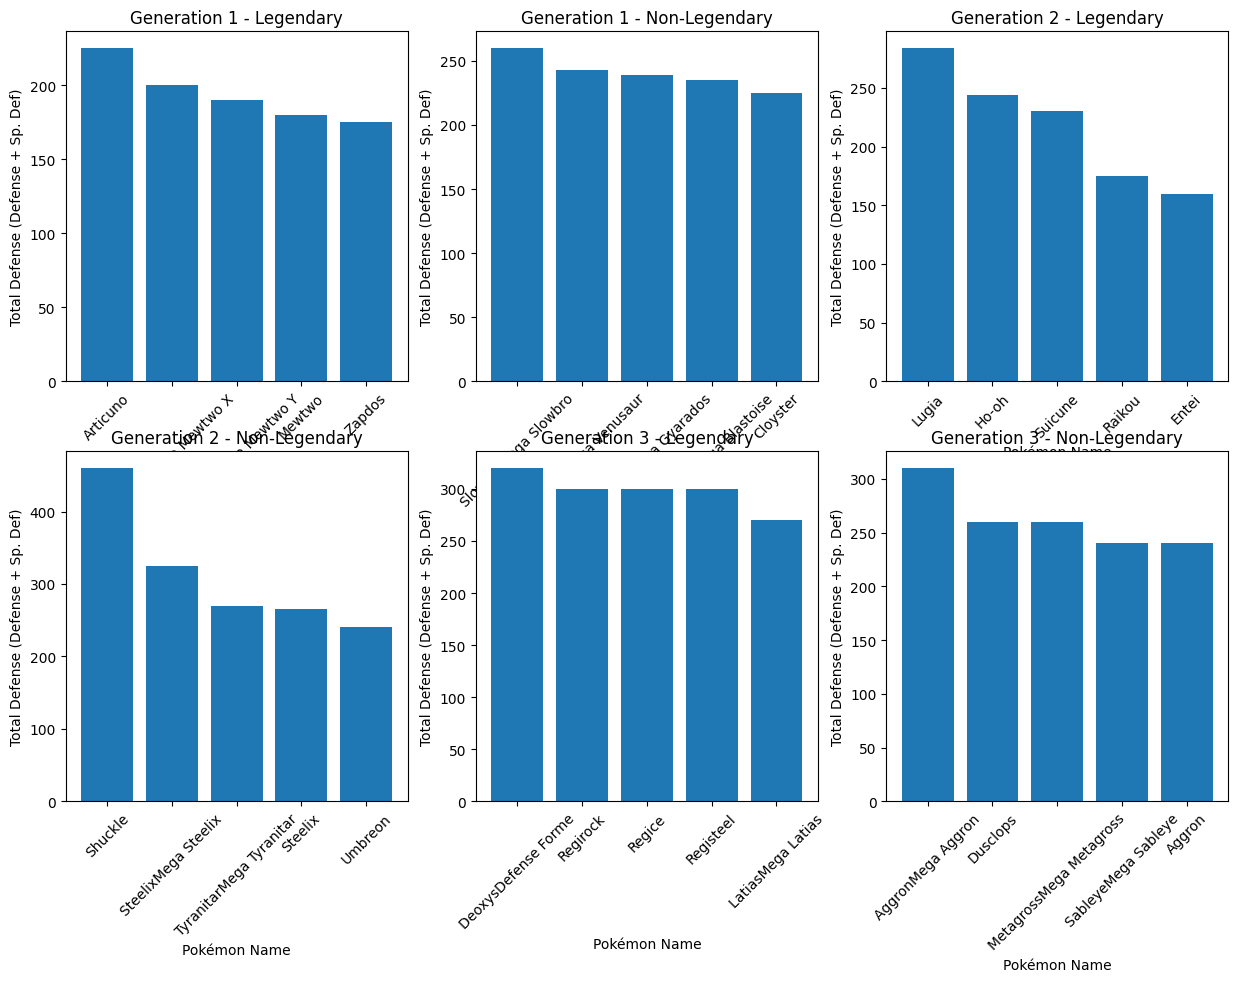

In [3]:
# Calculate the total defense by adding Defense and Special Defense
poda['Total Defense'] = poda['Defense'] + poda['Sp. Def']

# Create a new column to categorize Pokémon as Legendary or Non-Legendary
poda['Legendary'] = poda['Legendary'].apply(lambda x: 'Legendary' if x == True else 'Non-Legendary')

# Group the data by Generation and Legendary status
poda_grouped = poda.groupby(['Generation', 'Legendary'])

# Create a plot to visualize the results
fig, axs = plt.subplots(2, 3, figsize=(15, 10))

i, j = 0, 0
for (generation, legendary), group in poda_grouped:
    ax = axs[i, j]
    top_5_pokemon = group.nlargest(5, 'Total Defense')
    ax.bar(top_5_pokemon['Name'], top_5_pokemon['Total Defense'])
    ax.set_title(f'Generation {generation} - {legendary}')
    ax.set_xlabel('Pokémon Name')
    ax.set_ylabel('Total Defense (Defense + Sp. Def)')
    ax.tick_params(axis='x', rotation=45)
    j += 1
    if j == 3:
        i += 1
        j = 0

plt.tight_layout()
plt.show()

In [8]:
# Calculate the total defense by adding Defense and Special Defense
poda['Total Defense'] = poda['Defense'] + poda['Sp. Def']

# Create a new column to categorize Pokémon as Legendary or Non-Legendary
poda['Legendary'] = poda['Legendary'].apply(lambda x: 'Legendary' if x == True else 'Non-Legendary')

# Group the data by Generation and Legendary status
poda_grouped = poda.groupby(['Generation', 'Legendary'])

# Create a plot to visualize the results
fig, axs = poda.scatter(2, 3, figsize=(15, 10))

i, j = 0, 0
for (generation, legendary), group in poda_grouped:
    ax = axs[i, j]
    top_5_pokemon = group.nlargest(5, 'Total Defense')
    ax.plot(top_5_pokemon['Name'], top_5_pokemon['Total Defense'], marker='o', linestyle='-')
    ax.set_title(f'Generation {generation} - {legendary}')
    ax.set_xlabel('Pokémon Name')
    ax.set_ylabel('Total Defense (Defense + Sp. Def)')
    ax.tick_params(axis='x', rotation=45)
    j += 1
    if j == 3:
        i += 1
        j = 0

plt.tight_layout()
plt.show()

AttributeError: 'DataFrame' object has no attribute 'scatter'

In [ ]:
#defining label and colors
labels = ['No Evoluation','Evoluation']